# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Kadek Indri Anisa Putri
- **Email:** indrianisaputri14@gmail.com
- **ID Dicoding:** indrianisaputri

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap rata-rata jumlah penyewaan sepeda selama periode 2011–2012?
- Bagaimana perbedaan rata-rata penyewaan sepeda berdasarkan kondisi cuaca selama periode 2011–2012?
- Apakah terdapat perbedaan rata-rata penyewaan sepeda antara hari kerja dan akhir pekan selama dua tahun pengamatan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset terdiri dari dua file utama, yaitu data agregasi harian dan per jam.
- Variabel utama yang digunakan dalam analisis adalah season, weathersit, workingday, dan cnt.

### Assessing Data

In [4]:
day_df.info()
day_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ditemukan missing value pada dataset.
- Beberapa variabel masih dalam bentuk kode numerik dan perlu dilakukan mapping agar lebih mudah dipahami.

### Cleaning Data

In [5]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weather_map = {1: "Clear", 2: "Mist", 3: "Light Snow/Rain", 4: "Heavy Rain/Snow"}

day_df["season"] = day_df["season"].map(season_map)
day_df["weathersit"] = day_df["weathersit"].map(weather_map)

**Insight:**
- Tipe data tanggal berhasil dikonversi ke format datetime.
- Kategori musim dan kondisi cuaca telah diubah menjadi label yang lebih informatif.

## Exploratory Data Analysis (EDA)

### Explore Pola Penyewaan Berdasarkan Musim

In [ ]:
day_df.describe()
day_df.groupby("season")["cnt"].describe()
season_analysis = day_df.groupby("season")["cnt"].mean().reset_index()
season_analysis

,season,cnt
0,Fall,5644.303191
1,Spring,2604.132597
2,Summer,4992.331522
3,Winter,4728.162921


**Insight:**
- Rata-rata penyewaan sepeda menunjukkan variasi antar musim.
- Musim Fall memiliki rata-rata tertinggi dengan variasi yang cukup besar.

### Explore Pola Penyewaan Berdasarkan Cuaca

In [ ]:
day_df.describe()
day_df.groupby("weathersit")["cnt"].describe()
weather_analysis = day_df.groupby("weathersit")["cnt"].mean().reset_index()
weather_analysis

,weathersit,cnt
0,Clear,4876.786177
1,Light Snow/Rain,1803.285714
2,Mist,4035.862348


**Insight:**
- Cuaca Clear menunjukkan distribusi penyewaan paling tinggi dan stabil dibanding kondisi cuaca lainnya.
- Cuaca buruk seperti hujan atau salju menurunkan jumlah penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

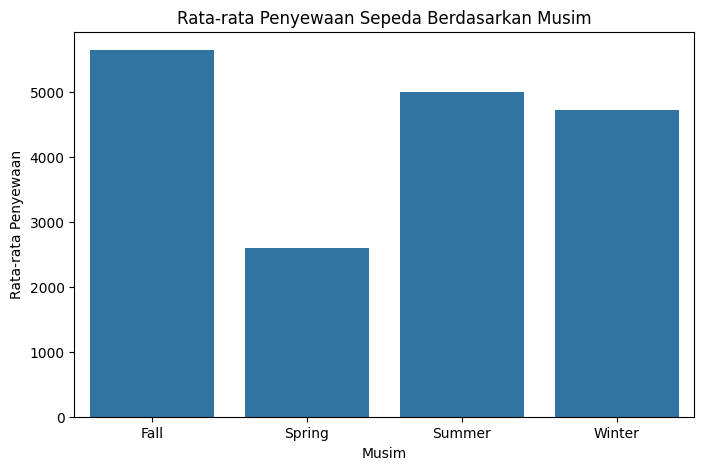

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(data=season_analysis, x="season", y="cnt")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

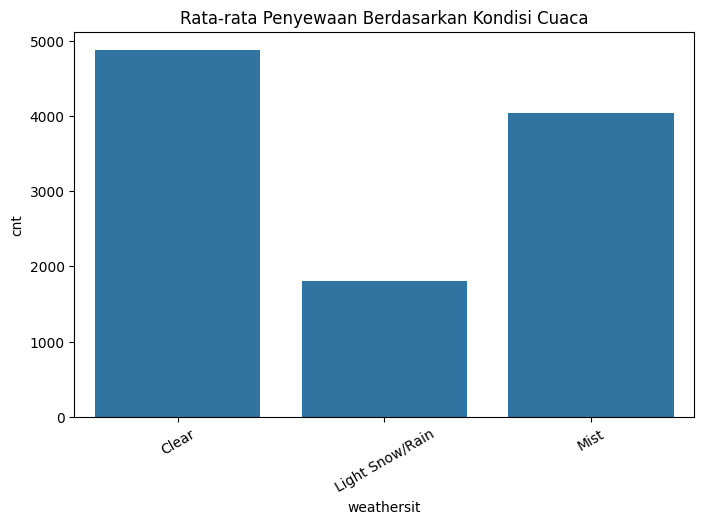

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(data=weather_analysis, x="weathersit", y="cnt")
plt.title("Rata-rata Penyewaan Berdasarkan Kondisi Cuaca")
plt.xticks(rotation=30)
plt.show()

**Insight:**
- Musim berpengaruh signifikan terhadap jumlah penyewaan sepeda.
- Kondisi cuaca cerah meningkatkan permintaan penyewaan dibandingkan cuaca buruk.

## Analisis Lanjutan (Opsional)

In [10]:
bins = [0, 2000, 4000, 7000]
labels = ["Low", "Medium", "High"]

day_df["rent_category"] = pd.cut(day_df["cnt"], bins=bins, labels=labels)

day_df["rent_category"].value_counts()

rent_category
High      358
Medium    181
Low        98
Name: count, dtype: int64

**Insight:**
- Pengelompokan ini membantu mengidentifikasi distribusi hari dengan tingkat penyewaan rendah, sedang, dan tinggi.

## Conclusion

- Musim Fall menunjukkan rata-rata penyewaan tertinggi selama periode 2011–2012 sehingga dapat menjadi waktu optimal untuk peningkatan armada.
- Kondisi cuaca cerah secara konsisten menghasilkan jumlah penyewaan lebih tinggi dibanding kondisi hujan atau bersalju.
- Hari kerja menunjukkan pola penggunaan yang lebih stabil dibanding akhir pekan.
- Disarankan agar pengelolaan distribusi sepeda mempertimbangkan faktor musim dan prakiraan cuaca untuk memaksimalkan utilisasi armada.

# **Simpan Data**

In [12]:
day_df.to_csv("dashboard/main_data.csv", index=False)